Dated: 30-3-18

CNN Tutorial with adam and using Data Augmentation

Dataset: MNIST

Spoilers:

This tutorial, i am going to use callback's Earlystopping,Modelcheckpoint and modelweight saving and loading

Installing Dependencies

In [2]:
import keras.backend as K
K._backend='tensorflow' if K.backend() else print("Requires no change in backend")

In [3]:
#Basic Necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import  time
np.random.seed(124) #for reproducibility purpose

In [4]:
#Installing Main Libraries
from keras.datasets import mnist

from keras.models import Sequential

from keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam,SGD,RMSprop
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import  ModelCheckpoint
from keras.callbacks import EarlyStopping

from keras.callbacks import TensorBoard


In [5]:
#defining parameters of Network
BATCH_SIZE=128
NUM_EPOCH=4
MODEL_DIR='\tmp'

In [6]:
#Creating Training and Testing data
(trainX,trainY),(testX,testY)=mnist.load_data()

print(trainX.shape,testX.shape,trainY.shape,testY.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


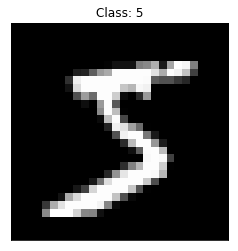

In [7]:
#Showing Mnist Image of 5 digit

plt.imshow(trainX[0],cmap='gray',interpolation="nearest")
plt.xticks([])
plt.yticks([])
plt.title("Class: "+str(trainY[0]))
plt.show()

In [8]:
#Preprocessing Input Data i.e X
trainX=trainX.reshape(trainX.shape[0],28,28,1)
testX=testX.reshape(testX.shape[0],28,28,1)

#convering int value to float type--- Model Works better with float values
trainX=trainX.astype('float32')
testX=testX.astype('float32')
trainX/=255
testX/=255

print(trainX.shape,testX.shape,trainY.shape,testY.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


In [9]:
#Preprocessing Output label i.e. Y
num_class=10
trainY=np_utils.to_categorical(trainY,num_class)
testY=np_utils.to_categorical(testY,num_class)
print(trainY.shape,testY.shape)

(60000, 10) (10000, 10)


### Creating Convolution Architecture
# 1.Convolution
# 2.Pooling
# 3.Dropout
Repeat step 1,2,3 to add more convolution layers in network

# 4.Fully Connected layer
Repeat to add more feed forward layers

# 5.Flatten
# 6.Classify Sample

Creating Architecture for CNN Model

In [10]:
#Model Creation phase
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

#Creating Fully Connected Network
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Dense(256))
BatchNormalization(axis=-1)
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
#compilation phase
#finding loss and backpropagating
model.compile(loss='categorical_crossentropy',optimizer="rmsprop",metrics=['accuracy'])


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 10, 10, 64)        0         
__________

In [12]:
#Data Augmentation for creating rich datset
traingen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08) #for training data augmentation ....properties are defined

testgen=ImageDataGenerator()  #for test data we don't need anytype of augmentation

#defining Genrator training phase
train_generator=traingen.flow(trainX,trainY,batch_size=64)
test_generator=testgen.flow(testX,testY,batch_size=64)

# Training Phase

In [15]:
history=model.fit_generator(train_generator,steps_per_epoch=60000//200,
                   epochs=2,validation_data=test_generator,validation_steps=10000//200)

Epoch 1/2
300/300 [==============================] - 203s 676ms/step - loss: 0.1908 - acc: 0.9409 - val_loss: 0.0772 - val_acc: 0.9750
Epoch 2/2
300/300 [==============================] - 201s 669ms/step - loss: 0.1094 - acc: 0.9664 - val_loss: 0.0436 - val_acc: 0.9875


In [24]:
#Prediciting Accuracy
score=model.evaluate(testX,testY)
print("Loss: {0} \t Accuracy: {1}%".format(round(score[0],5),round(score[1],3)*100))

10000/10000 [==============================] - 16s 2ms/step
Loss: 0.05371 	 Accuracy: 98.3%


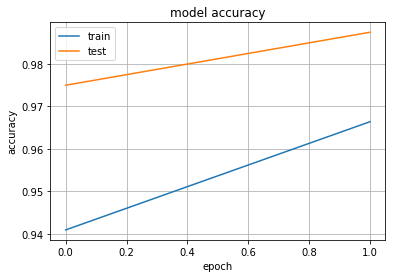

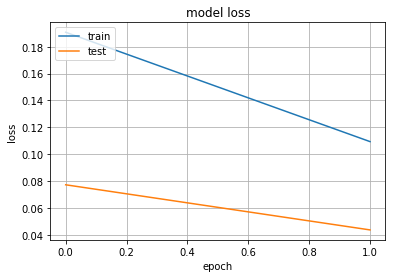

In [18]:

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()